In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import time

from multiprocess import Pool

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from visualization_utilities import *

Setting environment for Precision WorkStation


No vtk


In [2]:
stack = 'MD589'

In [3]:
# classifier_id = 38
# downscale = 4

detector_id = 15
downscale = 8

# One section

In [4]:
# fn = 'MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119'
fn = 'MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175'

In [5]:
from metadata import *

In [55]:
from skimage.color import rgb2lab, lab2rgb, rgb2hsv, hsv2rgb

In [106]:
# my_colormap = hsv2rgb(np.array([[(1., 1., l) for l in np.linspace(0,1,100)]])) # red
my_colormap = hsv2rgb(np.array([[(0.3, 1., l) for l in np.linspace(0,1,100)]])) # green

In [73]:
# from matplotlib.colors import ListedColormap
# my_cmap = ListedColormap(my_colormap)

In [53]:
# my_colormap = lab2rgb(np.array([[(l,)+(255,0) for l in np.linspace(0,100,100)]]))

In [47]:
%matplotlib inline

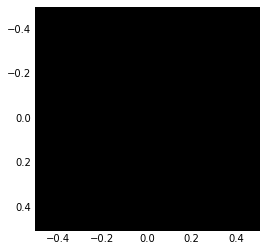

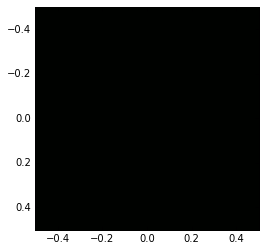

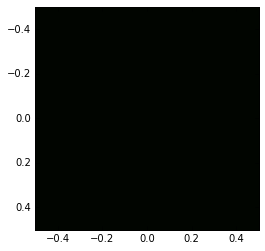

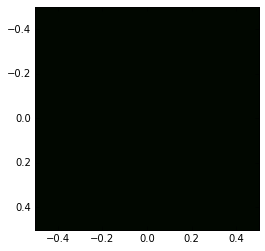

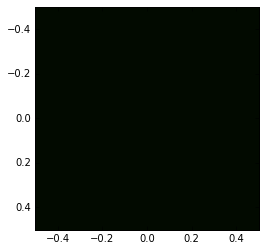

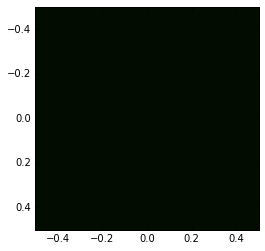

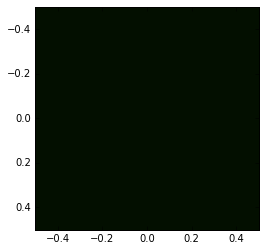

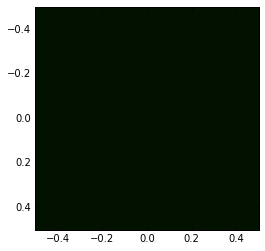

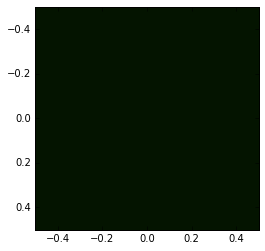

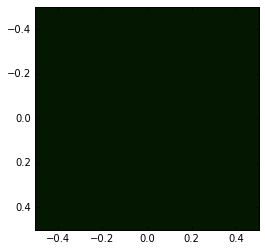

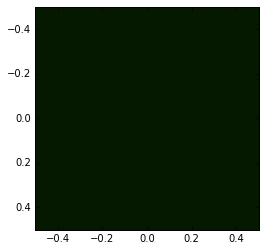

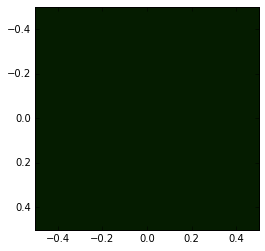

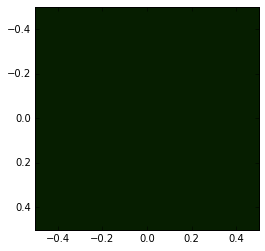

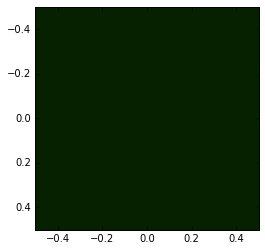

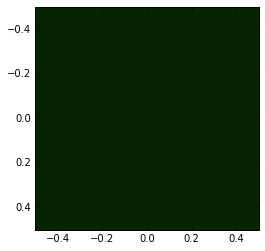

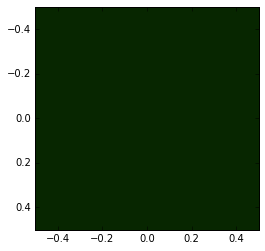

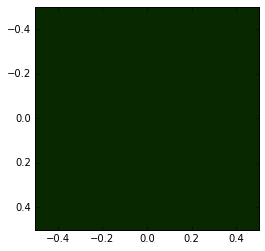

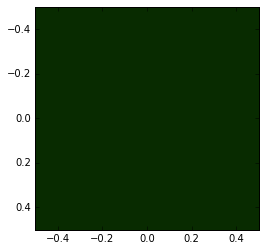

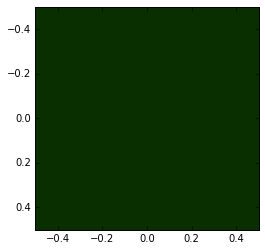

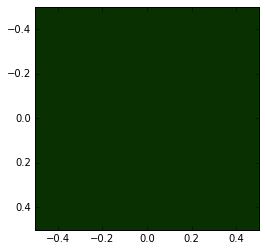

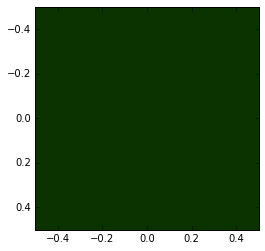

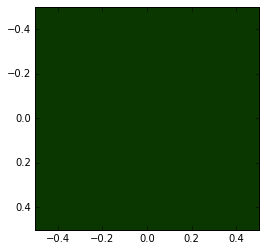

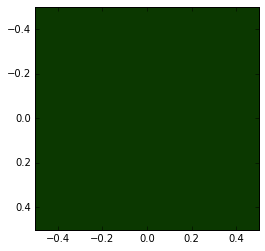

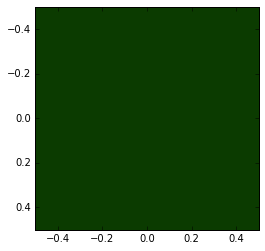

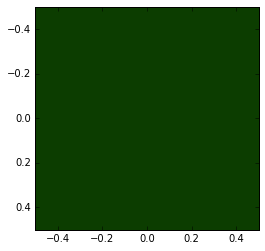

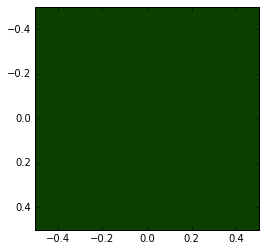

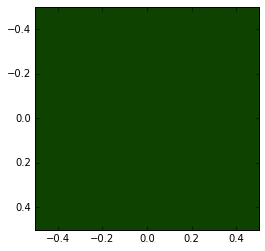

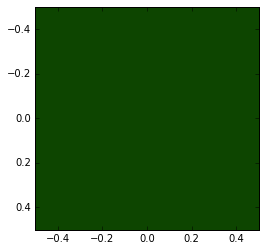

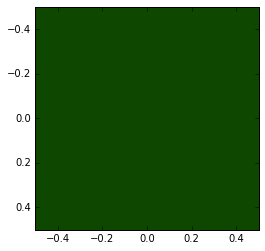

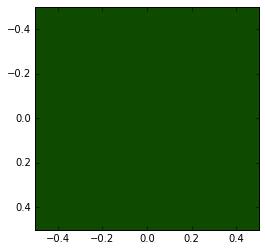

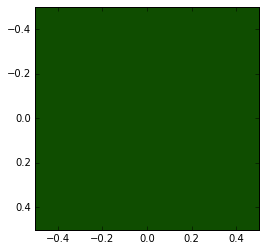

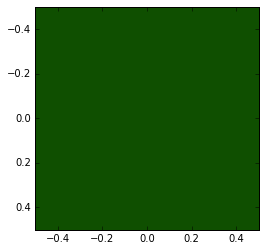

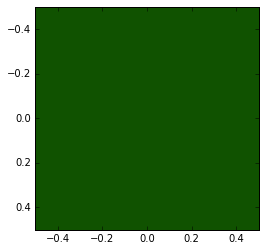

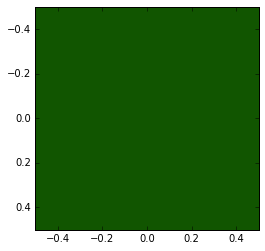

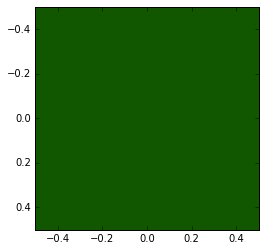

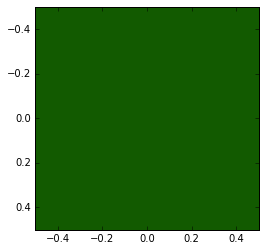

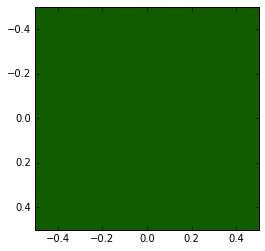

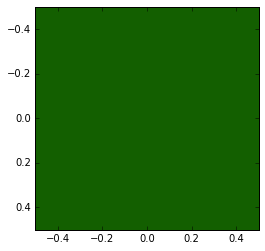

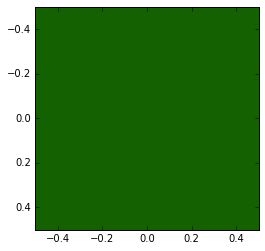

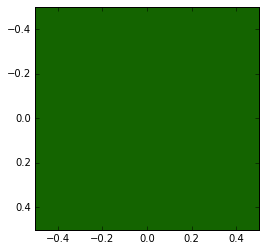

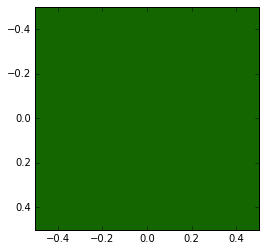

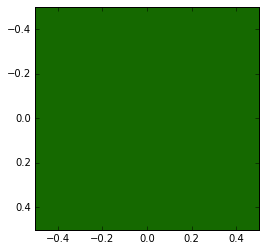

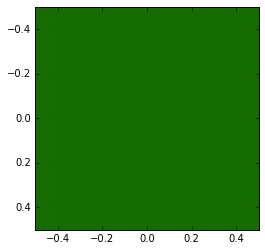

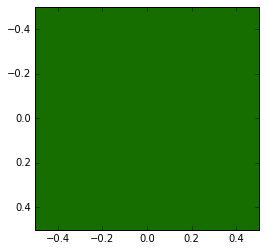

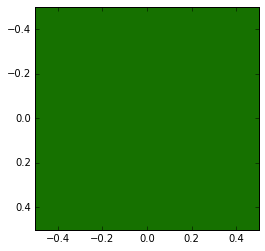

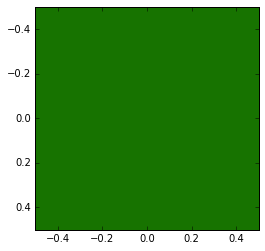

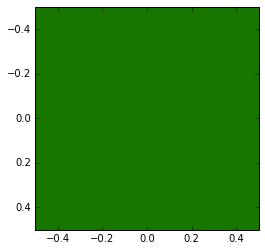

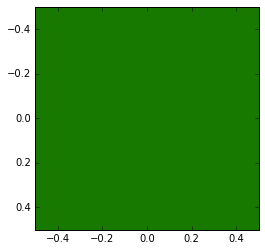

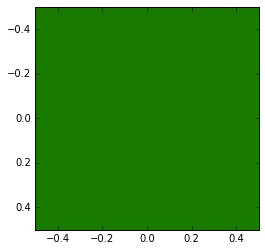

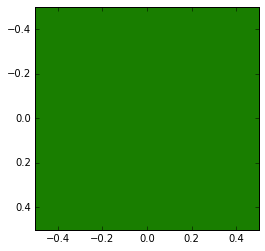

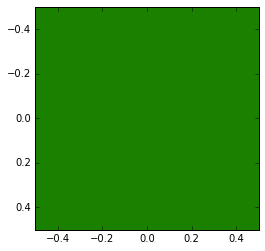

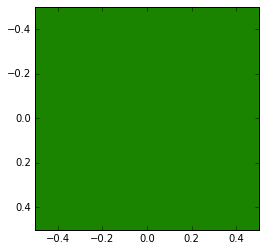

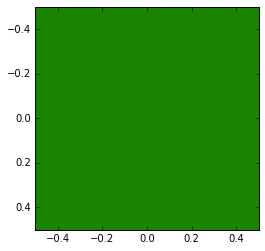

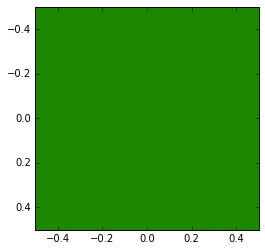

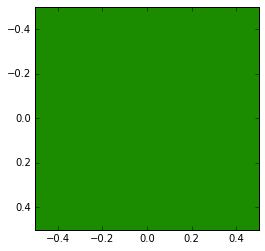

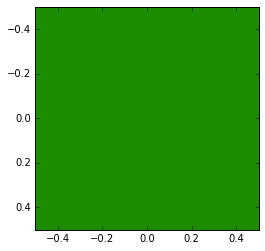

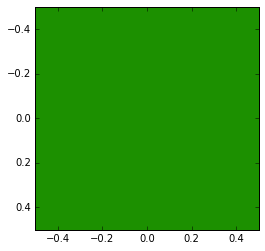

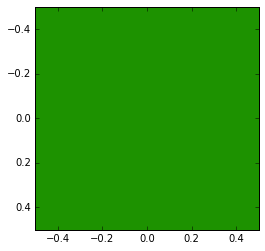

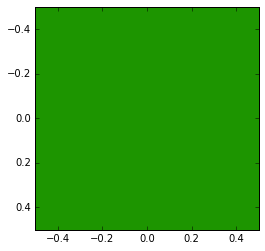

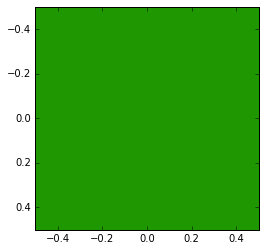

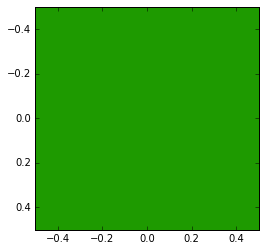

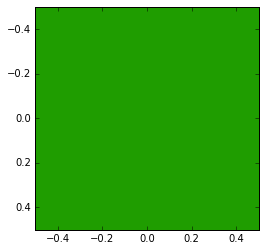

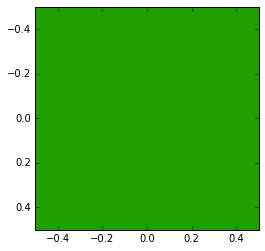

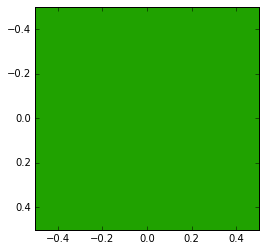

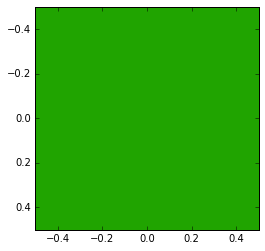

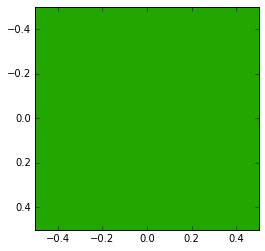

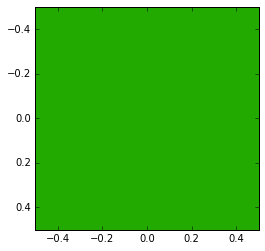

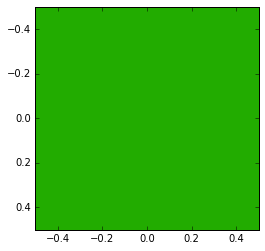

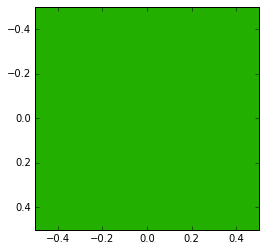

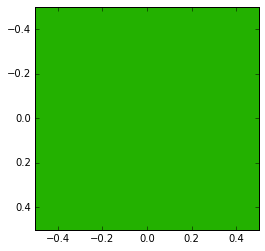

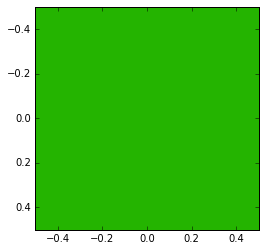

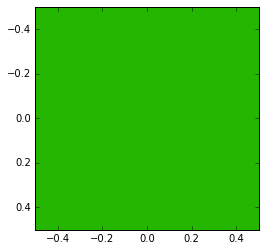

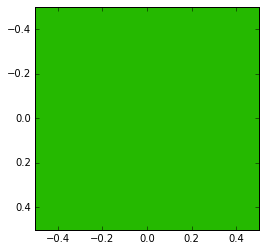

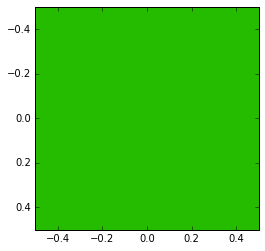

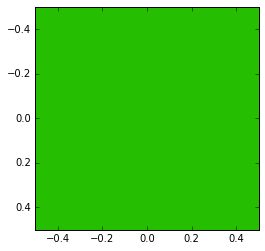

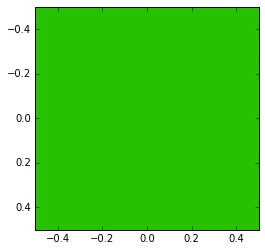

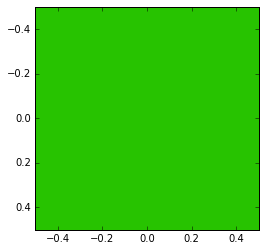

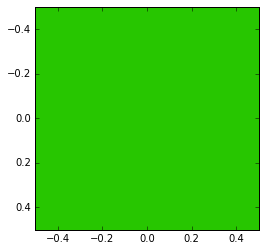

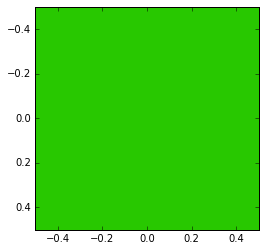

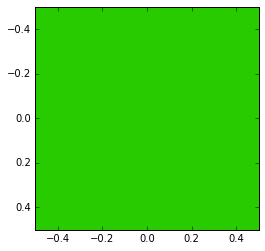

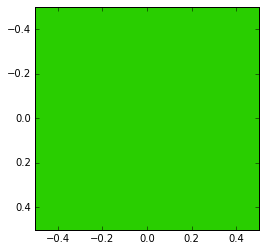

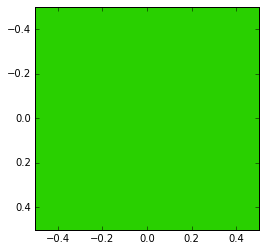

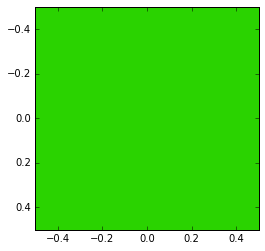

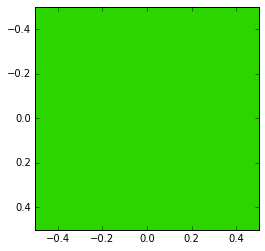

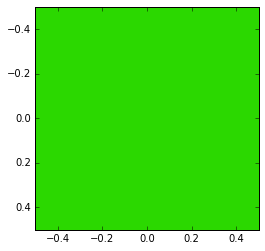

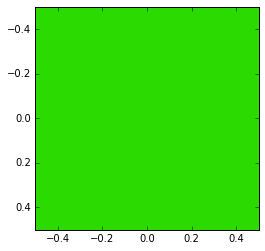

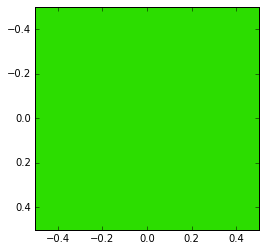

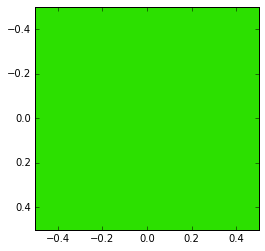

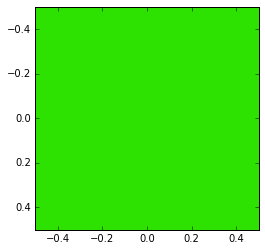

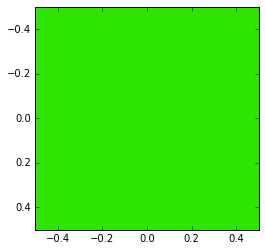

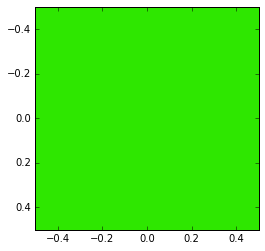

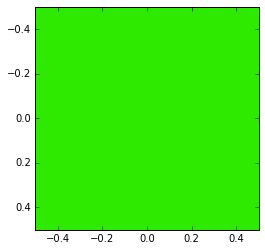

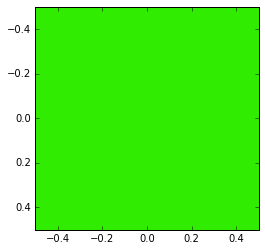

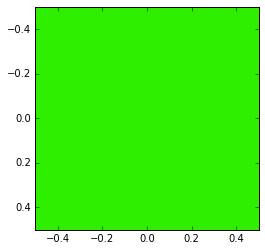

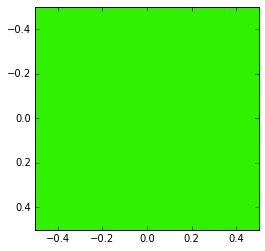

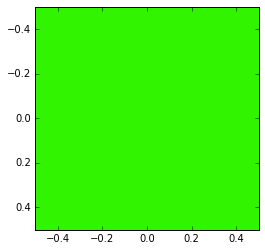

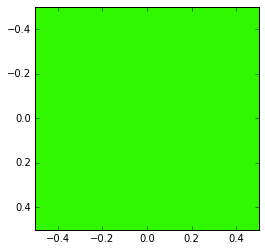

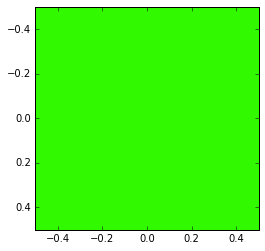

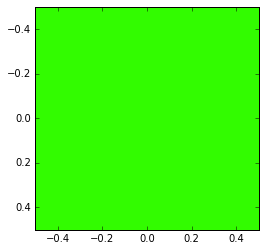

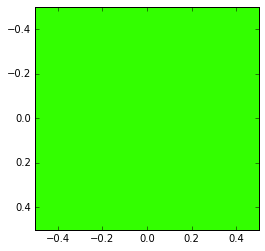

In [107]:
for rgb in my_colormap[0]:
    plt.imshow(np.array([[rgb]]))
    plt.show();

In [108]:
viz = generate_scoremap_layer(stack=stack, fn=fn, structure='7N', downscale=8, detector_id=detector_id,
                             colorlist=my_colormap[0])

In [114]:
viz = generate_scoremap_layer(stack=stack, fn=fn, structure='5N', downscale=8, detector_id=detector_id,
                             cmap_name='Reds')

In [20]:
viz = generate_scoremap_layer(stack=stack, fn=fn, structure='7N', downscale=8, detector_id=detector_id,
                             cmap_name='Greens')

In [112]:
viz = generate_scoremap_layer(stack=stack, fn=fn, structure='SNR', downscale=8, detector_id=detector_id,
                             cmap_name='Blues')

In [7]:
roi_bbox_7N = [6544,8920,2896,1928]
roi_bbox_SNR = [1232,4950,4048,3410]
roi_bbox_5N = [5376,6688,2088,2328]

In [8]:
viz = scoremap_overlay_on(bg='original', stack=stack, fn=fn, structure='SNR', 
                          out_downscale=8, detector_id=detector_id,
                         image_version='jpeg')

rm -rf "/home/yuncong/CSHL_scoremaps/down32/MD589/MD589_prep2_down32_detector15/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep2_down32_detector15/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep2_down32_detector15_SNR_scoremap.bp" && mkdir -p "/home/yuncong/CSHL_scoremaps/down32/MD589/MD589_prep2_down32_detector15/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep2_down32_detector15"
aws s3 cp "s3://mousebrainatlas-data/CSHL_scoremaps/down32/MD589/MD589_prep2_down32_detector15/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep2_down32_detector15/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep2_down32_detector15_SNR_scoremap.bp" "/home/yuncong/CSHL_scoremaps/down32/MD589/MD589_prep2_down32_detector15/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep2_down32_detector15/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep2_down32_detector15_SNR_scoremap.bp"


In [11]:
%matplotlib inline

In [35]:
im = DataManager.load_image_v2(stack=stack, fn=fn, prep_id=2, version='jpeg')

In [38]:
# roi_bbox = roi_bbox_7N
# roi_bbox = roi_bbox_5N
roi_bbox = roi_bbox_SNR
display_image(im[roi_bbox[1]:roi_bbox[1]+roi_bbox[3], roi_bbox[0]:roi_bbox[0]+roi_bbox[2]])

/home/yuncong/Brain/learning/tmp.jpg

In [49]:
# roi_bbox = np.array(roi_bbox_7N)/8
roi_bbox = np.array(roi_bbox_5N)/8
# roi_bbox = np.array(roi_bbox_SNR)/8
display_image(viz[roi_bbox[1]:roi_bbox[1]+roi_bbox[3], roi_bbox[0]:roi_bbox[0]+roi_bbox[2]])

/home/yuncong/Brain/learning/tmp.jpg

In [115]:
display_image(viz)

/home/yuncong/Brain/learning/tmp.jpg

In [ ]:
# Old

In [15]:
sec = 290
actual_setting = resolve_actual_setting(setting=classifier_id, stack=stack, sec=sec)
# DataManager.get_downscaled_scoremap_viz_filepath(stack=stack, section=sec, structure='7N', setting=actual_setting)
viz = scoremap_overlay(stack=stack, sec=sec, structure='7N', downscale=downscale, setting=actual_setting)
# viz = scoremap_overlay_on(bg=bg, stack=stack, sec=sec, structure='7N', 
#                           downscale=downscale, label_text=None, setting=actual_setting)

In [16]:
display_image(viz, filename='tmp.png')

/shared/MouseBrainAtlas/learning/tmp.png

# Many sections

In [4]:
add_label_text = True

In [5]:
for sec in [201]:
# for sec in metadata_cache['valid_sections'][stack]:

    actual_setting = resolve_actual_setting(setting=classifier_id, stack=stack, sec=sec)

    t = time.time()

    def save_scoremap(structure):
        viz_fp = DataManager.get_scoremap_viz_filepath(stack=stack, downscale=downscale, section=sec, 
                                                       structure=structure, classifier_id=actual_setting)
        create_parent_dir_if_not_exists(viz_fp)
        try:
            if add_label_text:
                label_text = str(structure)
            else:
                label_text = None

            viz = scoremap_overlay_on(bg='original', stack=stack, sec=sec, structure=structure,
                                out_downscale=downscale, label_text=label_text, classifier_id=actual_setting,
                                     cmap_name='hot')
            imsave(viz_fp, img_as_ubyte(viz))
            upload_to_s3(viz_fp)
        except Exception as e:
            sys.stderr.write('%s\n' % e)
            return
    
    pool = Pool(NUM_CORES)
    pool.map(save_scoremap, all_known_structures)
    pool.close()
    pool.join()

    sys.stderr.write('Visualize scoremaps: %.2f seconds.\n' % (time.time() - t)) 
    # 7s for one structure, one section, single process
    # 20s for all structures, one section, 8 processes

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: U

aws s3 cp /shared/CSHL_scoremaps_down4_viz/4N/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38_scoremap.jpg s3://mousebrainatlas-data/CSHL_scoremaps_down4_viz/4N/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38_scoremap.jpg
aws s3 cp /shared/CSHL_scoremaps_down4_viz/6N/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38_scoremap.jpg s3://mousebrainatlas-data/CSHL_scoremaps_down4_viz/6N/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38_scoremap.jpg
aws s3 cp /shared/CSHL_scoremaps_down4_viz/Amb/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38_scorem

Error loading scoremap of sp5 for image MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121: No scoremap for image MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121 (section 201) for label sp5


Error loading scoremap of outerContour for image MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121: No scoremap for image MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121 (section 201) for label outerContour




aws s3 cp /shared/CSHL_scoremaps_down4_viz/Sp5C/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38_scoremap.jpg s3://mousebrainatlas-data/CSHL_scoremaps_down4_viz/Sp5C/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38_scoremap.jpg
aws s3 cp /shared/CSHL_scoremaps_down4_viz/PBG/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38_scoremap.jpg s3://mousebrainatlas-data/CSHL_scoremaps_down4_viz/PBG/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38_scoremap.jpg
aws s3 cp /shared/CSHL_scoremaps_down4_viz/Sp5O/MD590/clf38/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_lossless_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped_down4_clf38

Visualize scoremaps: 29.20 seconds.
